# Violin plots

Violin plot is an connection of KDE and box plot, the violin plot is categorical distribution plot

## 1. Importing modules and preparing data

### 1.1 Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
cars = sns.load_dataset('mpg').dropna()

In [3]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
sns.set_style('whitegrid')

### 1.2 Cleaning

In [5]:
cars['cylinders'].value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

To make visualizations more redable there's no need to keeb odd cylinder amount cars, let's drop them:

In [6]:
cars = cars[cars['cylinders'].isin([4,6,8])]

## 2.Visualizations

### 2.1 Basics

<AxesSubplot:xlabel='displacement'>

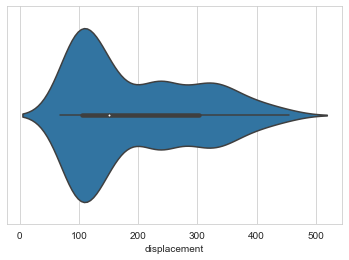

In [7]:
sns.violinplot(cars['displacement'])

<AxesSubplot:xlabel='cylinders', ylabel='displacement'>

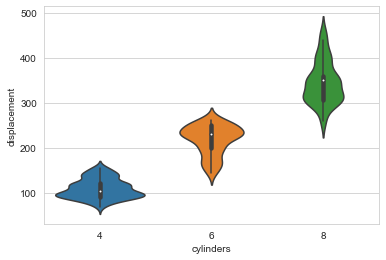

In [9]:
sns.violinplot(x=cars['cylinders'], y=cars['displacement'])

<AxesSubplot:xlabel='cylinders', ylabel='displacement'>

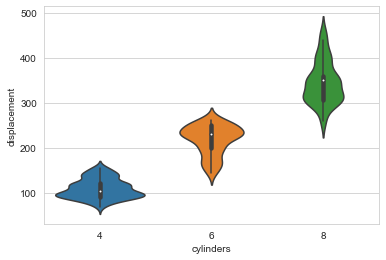

In [12]:
sns.violinplot( data=cars, x='cylinders', y='displacement')

### Hue

<AxesSubplot:xlabel='cylinders', ylabel='displacement'>

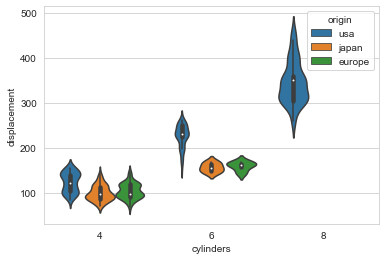

In [13]:
sns.violinplot( data=cars, x='cylinders', y='displacement',
              hue='origin')

### 2.2 Violinplot Options

<AxesSubplot:xlabel='cylinders', ylabel='displacement'>

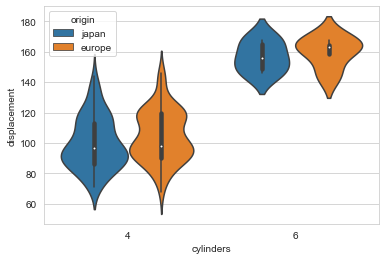

In [14]:
sns.violinplot(x='cylinders', y='displacement', hue='origin',
              data=cars[cars.origin.isin(['japan','europe'])])

#### Split

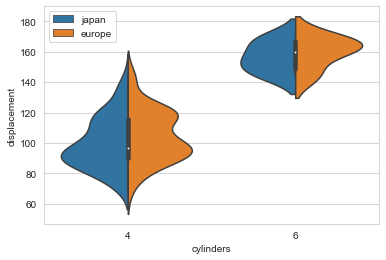

In [17]:
sns.violinplot(x='cylinders', y='displacement', hue='origin',
              data=cars[cars.origin.isin(['japan','europe'])],
              split=True)
plt.legend(loc=2)

***NOTICE: if you wanna use split you need to have exacly 2 categories in your hue argument!!!***

#### Inner

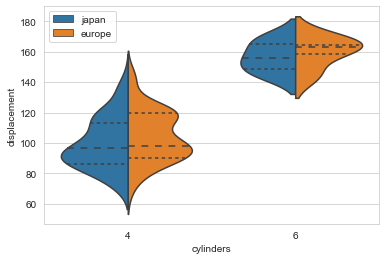

In [18]:
sns.violinplot(x='cylinders', y='displacement', hue='origin',
              data=cars[cars.origin.isin(['japan','europe'])],
              split=True, inner='quartiles')
plt.legend(loc=2)

#### scale

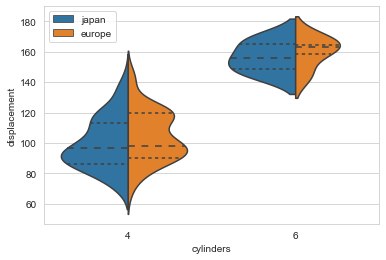

In [19]:
sns.violinplot(x='cylinders', y='displacement', hue='origin',
              data=cars[cars.origin.isin(['japan','europe'])],
              split=True, inner='quartiles', scale='count')
plt.legend(loc=2)

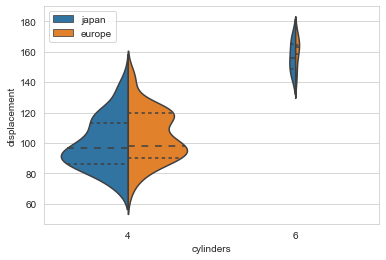

In [20]:
sns.violinplot(x='cylinders', y='displacement', hue='origin',
              data=cars[cars.origin.isin(['japan','europe'])],
              split=True, inner='quartiles', scale='count',
              scale_hue=False)
plt.legend(loc=2)

In [23]:
(
    cars[cars.origin.isin(['japan','europe'])]
    .groupby('cylinders')
    .origin
    .value_counts()
)

cylinders  origin
4          japan     69
           europe    61
6          japan      6
           europe     4
Name: origin, dtype: int64

### 3. Styling

#### order

<AxesSubplot:xlabel='origin', ylabel='displacement'>

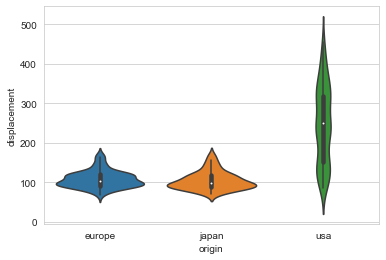

In [25]:
sns.violinplot(x=cars.origin, y=cars.displacement,
              order=['europe', 'japan', 'usa'])

#### linewidth

<AxesSubplot:xlabel='origin', ylabel='displacement'>

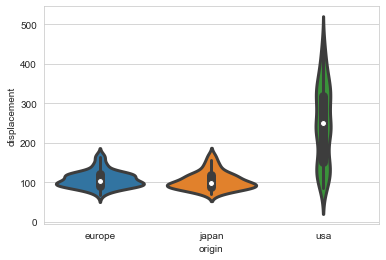

In [26]:
sns.violinplot(x=cars.origin, y=cars.displacement,
              order=['europe', 'japan', 'usa'], linewidth=3)

#### KDE options

###### bandwith

<AxesSubplot:xlabel='origin', ylabel='displacement'>

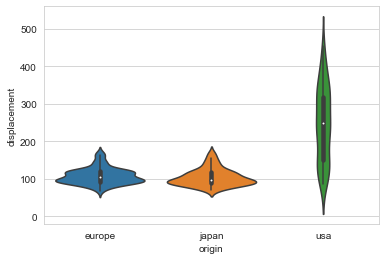

In [28]:
sns.violinplot(x=cars.origin, y=cars.displacement,
              order=['europe', 'japan', 'usa'], bw=.4)